# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("--------------------------")

# Use a for loop to interate through the cities and determine the 
city_count = 1
for city in cities:
    if city_count == 59 :
        time.sleep(60)
        try:
            query_url = f"{url}appid={weather_api_key}&q={city}"
            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            weather_report = weather_json["weather"][0]["description"]
            print(f'Processing Record {city_count} of Set 1 | {city}')
            print(f'Weather in {city} is {weather_report}')
            city_count += 1
        except KeyError:
            print('City not found. Skipping...')
    
print("--------------------------")
print("Data Retrieval Complete ")
print("--------------------------")

Beginning Data Retrieval
--------------------------
--------------------------
Data Retrieval Complete 
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe to house the city weather data 
city_weather = pd.DataFrame({'City': cities, 'Lat': "", 'Lng': "", 'Max Temp': '', 'Humidity': "", 'Cloudiness': "",\
                             'Wind Speed': "", 'Country': "", 'Date': ""})

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,,,,,,,,
1,atuona,,,,,,,,
2,ust-ishim,,,,,,,,
3,tocopilla,,,,,,,,
4,porto belo,,,,,,,,
...,...,...,...,...,...,...,...,...,...
606,bone,,,,,,,,
607,bereda,,,,,,,,
608,poya,,,,,,,,
609,port hardy,,,,,,,,


In [26]:
# Continue to build the dataframe by inputting the missing data for each city 

for index, row in city_weather.iterrows():
    city_name = row['City']
    print(f"Retrieving Results for Index {index}: {city_name}.")
    
    # Try statement included to allow script to continue if any errors are encountered during the search
    
    try:
        query_url = f"{url}appid={weather_api_key}&q={city_name}"
        # Get weather data
        weather_response = requests.get(query_url).json()
        city_weather.loc[index, 'Lat'] = weather_response['coord']['lat']
        city_weather.loc[index, 'Lng'] = weather_response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        city_weather.loc[index, 'Humidity'] = weather_response['main']['humidity']
        city_weather.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        city_weather.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        city_weather.loc[index, 'Country'] = weather_response['sys']['country']
        city_weather.loc[index, 'Date'] = weather_response['dt']
        
    # except statement (handling key errors and index errors)  
    
    except (KeyError, IndexError):
        
        # simple print statement
        print("Missing field/result... skipping.")
        pass 

print("--------------------------")
print("Data Retrieval Complete ")
print("--------------------------")

Retrieving Results for Index 0: east london.
Retrieving Results for Index 1: atuona.
Retrieving Results for Index 2: ust-ishim.
Retrieving Results for Index 3: tocopilla.
Retrieving Results for Index 4: porto belo.
Retrieving Results for Index 5: kahului.
Retrieving Results for Index 6: ushuaia.
Retrieving Results for Index 7: souillac.
Retrieving Results for Index 8: punta arenas.
Retrieving Results for Index 9: gimli.
Retrieving Results for Index 10: tutoia.
Retrieving Results for Index 11: barentsburg.
Missing field/result... skipping.
Retrieving Results for Index 12: busselton.
Retrieving Results for Index 13: puerto ayora.
Retrieving Results for Index 14: marzuq.
Retrieving Results for Index 15: necochea.
Retrieving Results for Index 16: hilo.
Retrieving Results for Index 17: bredasdorp.
Retrieving Results for Index 18: tuktoyaktuk.
Retrieving Results for Index 19: marcona.
Missing field/result... skipping.
Retrieving Results for Index 20: puerto leguizamo.
Retrieving Results for 

Retrieving Results for Index 176: shelburne.
Retrieving Results for Index 177: komsomolskiy.
Retrieving Results for Index 178: unye.
Missing field/result... skipping.
Retrieving Results for Index 179: guerrero negro.
Retrieving Results for Index 180: ponta do sol.
Retrieving Results for Index 181: umm durman.
Missing field/result... skipping.
Retrieving Results for Index 182: okhotsk.
Retrieving Results for Index 183: la ronge.
Retrieving Results for Index 184: los llanos de aridane.
Retrieving Results for Index 185: pishva.
Retrieving Results for Index 186: mamallapuram.
Retrieving Results for Index 187: klaksvik.
Retrieving Results for Index 188: karamay.
Missing field/result... skipping.
Retrieving Results for Index 189: daru.
Retrieving Results for Index 190: petropavlovsk-kamchatskiy.
Retrieving Results for Index 191: nueva gerona.
Retrieving Results for Index 192: thunder bay.
Retrieving Results for Index 193: vao.
Retrieving Results for Index 194: higuey.
Missing field/result...

Retrieving Results for Index 351: aginskoye.
Retrieving Results for Index 352: praia da vitoria.
Retrieving Results for Index 353: luderitz.
Retrieving Results for Index 354: ossora.
Retrieving Results for Index 355: iqaluit.
Retrieving Results for Index 356: kidal.
Retrieving Results for Index 357: juneau.
Retrieving Results for Index 358: camapua.
Retrieving Results for Index 359: gibara.
Retrieving Results for Index 360: padang.
Retrieving Results for Index 361: sungaipenuh.
Retrieving Results for Index 362: taltal.
Retrieving Results for Index 363: steinheim.
Retrieving Results for Index 364: rungata.
Missing field/result... skipping.
Retrieving Results for Index 365: puerto carreno.
Retrieving Results for Index 366: tilichiki.
Retrieving Results for Index 367: tukrah.
Retrieving Results for Index 368: galveston.
Retrieving Results for Index 369: sentyabrskiy.
Missing field/result... skipping.
Retrieving Results for Index 370: laguna.
Retrieving Results for Index 371: mitsamiouli.


Retrieving Results for Index 521: santiago del estero.
Retrieving Results for Index 522: murwara.
Retrieving Results for Index 523: maniitsoq.
Retrieving Results for Index 524: aljezur.
Retrieving Results for Index 525: ust-kamchatsk.
Missing field/result... skipping.
Retrieving Results for Index 526: willowmore.
Retrieving Results for Index 527: umm lajj.
Retrieving Results for Index 528: sofiysk.
Missing field/result... skipping.
Retrieving Results for Index 529: svetlogorsk.
Retrieving Results for Index 530: sao raimundo das mangabeiras.
Retrieving Results for Index 531: sawakin.
Retrieving Results for Index 532: fenoarivo.
Retrieving Results for Index 533: susangerd.
Retrieving Results for Index 534: oksfjord.
Retrieving Results for Index 535: hereford.
Retrieving Results for Index 536: berbera.
Retrieving Results for Index 537: vila franca do campo.
Retrieving Results for Index 538: olinda.
Retrieving Results for Index 539: warqla.
Missing field/result... skipping.
Retrieving Resu

In [43]:
# Display the dataframe to assess the results of the API request and assignments
city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,294.69,74,100,4.99,ZA,1650591698
1,atuona,-9.8,-139.0333,299.43,80,11,6.27,PF,1650591773
2,ust-ishim,57.6935,71.1665,266.47,63,64,5.27,RU,1650591773
3,tocopilla,-22.092,-70.1979,292.04,78,43,3.45,CL,1650591727
4,porto belo,-27.1578,-48.5531,296.07,87,100,4.19,BR,1650591773
5,kahului,20.8947,-156.47,301.16,64,40,10.8,US,1650590951
6,ushuaia,-54.8,-68.3,277.96,81,75,5.14,AR,1650591491
7,souillac,-20.5167,57.5167,297.36,88,40,2.06,MU,1650591472
8,punta arenas,-53.15,-70.9167,279.21,75,75,1.54,CL,1650591549
9,gimli,50.6336,-96.9907,272.16,80,100,2.06,CA,1650591774


In [44]:
# Export file as a CSV, without the Pandas index, but with the header

city_weather.to_csv("weather_report1.csv", index=False, header=True)

In [45]:
# Create a new dataframe that keeps the columns with values to allow for further analysis 
city_weather_limited = pd.DataFrame({'Lat':city_weather['Lat'],'Lng':city_weather['Lng'],\
                                     'Max Temp':city_weather['Max Temp'],'Humidity':city_weather['Humidity'],\
                                     'Cloudiness':city_weather['Cloudiness'],\
                                     'Wind Speed':city_weather['Wind Speed'], 'Date':city_weather['Date']})
city_weather_limited

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-33.0153,27.9116,294.69,74,100,4.99,1650591698
1,-9.8,-139.0333,299.43,80,11,6.27,1650591773
2,57.6935,71.1665,266.47,63,64,5.27,1650591773
3,-22.092,-70.1979,292.04,78,43,3.45,1650591727
4,-27.1578,-48.5531,296.07,87,100,4.19,1650591773
5,20.8947,-156.47,301.16,64,40,10.8,1650590951
6,-54.8,-68.3,277.96,81,75,5.14,1650591491
7,-20.5167,57.5167,297.36,88,40,2.06,1650591472
8,-53.15,-70.9167,279.21,75,75,1.54,1650591549
9,50.6336,-96.9907,272.16,80,100,2.06,1650591774


In [46]:
# Replacing the empty cells with NaN that would allow us to remove those rows next 

city_weather_limited['Lat'].replace('', np.nan, inplace=True)
city_weather_limited['Lng'].replace('', np.nan, inplace=True)
city_weather_limited['Max Temp'].replace('', np.nan, inplace=True)
city_weather_limited['Humidity'].replace('', np.nan, inplace=True)
city_weather_limited['Cloudiness'].replace('', np.nan, inplace=True)
city_weather_limited['Wind Speed'].replace('', np.nan, inplace=True)
city_weather_limited['Date'].replace('', np.nan, inplace=True)

# Display the complete database to scan for the NaN rows
pd.set_option('display.max_rows', None)

city_weather_limited

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-33.0153,27.9116,294.69,74.0,100.0,4.99,1.650592e+09
1,-9.8000,-139.0333,299.43,80.0,11.0,6.27,1.650592e+09
2,57.6935,71.1665,266.47,63.0,64.0,5.27,1.650592e+09
3,-22.0920,-70.1979,292.04,78.0,43.0,3.45,1.650592e+09
4,-27.1578,-48.5531,296.07,87.0,100.0,4.19,1.650592e+09
5,20.8947,-156.4700,301.16,64.0,40.0,10.80,1.650591e+09
6,-54.8000,-68.3000,277.96,81.0,75.0,5.14,1.650591e+09
7,-20.5167,57.5167,297.36,88.0,40.0,2.06,1.650591e+09
8,-53.1500,-70.9167,279.21,75.0,75.0,1.54,1.650592e+09
9,50.6336,-96.9907,272.16,80.0,100.0,2.06,1.650592e+09


In [47]:
# Drop the NaN rows
city_weather_limited.dropna()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-33.0153,27.9116,294.69,74.0,100.0,4.99,1.650592e+09
1,-9.8000,-139.0333,299.43,80.0,11.0,6.27,1.650592e+09
2,57.6935,71.1665,266.47,63.0,64.0,5.27,1.650592e+09
3,-22.0920,-70.1979,292.04,78.0,43.0,3.45,1.650592e+09
4,-27.1578,-48.5531,296.07,87.0,100.0,4.19,1.650592e+09
5,20.8947,-156.4700,301.16,64.0,40.0,10.80,1.650591e+09
6,-54.8000,-68.3000,277.96,81.0,75.0,5.14,1.650591e+09
7,-20.5167,57.5167,297.36,88.0,40.0,2.06,1.650591e+09
8,-53.1500,-70.9167,279.21,75.0,75.0,1.54,1.650592e+09
9,50.6336,-96.9907,272.16,80.0,100.0,2.06,1.650592e+09


In [48]:
# Check the data types for the remaining data
city_weather_limited.dtypes

Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date          float64
dtype: object

In [33]:
# Use the describe method to display a statistical summary of the values for each column 
city_weather_limited.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.00000,5.510000e+02
mean,21.011536,20.864208,288.450218,71.852995,62.177858,3.41392,1.650592e+09
std,33.011668,88.196662,10.944369,21.998310,38.403091,2.44174,1.052995e+02
min,-54.800000,-175.200000,252.230000,1.000000,0.000000,0.00000,1.650591e+09
25%,-6.953150,-55.533450,280.250000,62.000000,20.000000,1.56500,1.650592e+09
50%,25.783300,24.731400,290.050000,78.000000,75.000000,2.87000,1.650592e+09
75%,50.024850,93.363050,297.705000,88.000000,100.000000,4.63000,1.650592e+09
max,78.218600,179.316700,305.740000,100.000000,100.000000,13.86000,1.650592e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Display the records where humidity is > 100%

humidity_city_data = city_weather_limited[(city_weather_limited['Humidity'] > 100)].index
humidity_city_data

Int64Index([], dtype='int64')

In [35]:
#  Get the indices of cities that have humidity over 100%.


#### There are no cities with a humidity > 100%

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [37]:
# Determine the Humidity outliers 

Humidity_data = city_weather_limited['Humidity']
quartiles = Humidity_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("--------------------------------------")
print(" ")
index_ids = []
counter = 1
for Humidity in Humidity_data:
    if Humidity < lower_bound:
        print(f"Humidity has an outlier of {Humidity} at index {counter}")
        index_ids.append(counter)
    elif Humidity > upper_bound:
        print(f"Humidity has an outlier of {Humidity} at index {counter}")
        index_ids.append(counter)
    counter += 1

The lower quartile of Humidity is: 62.0
The upper quartile of Humidity is: 88.0
The interquartile range of Humidity is: 26.0
The the median of Humidity is: 78.0 
Values below 23.0 could be outliers.
Values above 127.0 could be outliers.
--------------------------------------
 
Humidity has an outlier of 15.0 at index 98
Humidity has an outlier of 13.0 at index 105
Humidity has an outlier of 18.0 at index 121
Humidity has an outlier of 11.0 at index 141
Humidity has an outlier of 12.0 at index 142
Humidity has an outlier of 11.0 at index 153
Humidity has an outlier of 14.0 at index 208
Humidity has an outlier of 11.0 at index 247
Humidity has an outlier of 12.0 at index 293
Humidity has an outlier of 9.0 at index 309
Humidity has an outlier of 18.0 at index 317
Humidity has an outlier of 20.0 at index 328
Humidity has an outlier of 1.0 at index 338
Humidity has an outlier of 16.0 at index 357
Humidity has an outlier of 19.0 at index 384
Humidity has an outlier of 17.0 at index 385
Humid

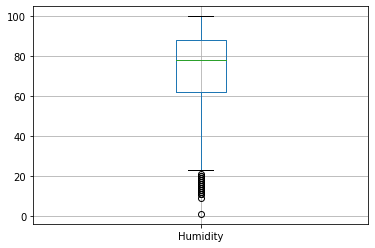

In [38]:

boxplot = city_weather_limited.boxplot(column=['Humidity'])

In [39]:
print(index_ids)

[98, 105, 121, 141, 142, 153, 208, 247, 293, 309, 317, 328, 338, 357, 384, 385, 406, 420, 429, 447, 485, 534, 589, 595]


In [40]:
for row in index_ids:
    city_weather_limited.drop([row], axis=0, inplace = False)

#city_weather_limited.drop(city_weather_limited.index[index_ids], inplace= False)

In [41]:
city_weather_limited

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-33.0153,27.9116,294.69,74.0,100.0,4.99,1.650592e+09
1,-9.8000,-139.0333,299.43,80.0,11.0,6.27,1.650592e+09
2,57.6935,71.1665,266.47,63.0,64.0,5.27,1.650592e+09
3,-22.0920,-70.1979,292.04,78.0,43.0,3.45,1.650592e+09
4,-27.1578,-48.5531,296.07,87.0,100.0,4.19,1.650592e+09
5,20.8947,-156.4700,301.16,64.0,40.0,10.80,1.650591e+09
6,-54.8000,-68.3000,277.96,81.0,75.0,5.14,1.650591e+09
7,-20.5167,57.5167,297.36,88.0,40.0,2.06,1.650591e+09
8,-53.1500,-70.9167,279.21,75.0,75.0,1.54,1.650592e+09
9,50.6336,-96.9907,272.16,80.0,100.0,2.06,1.650592e+09


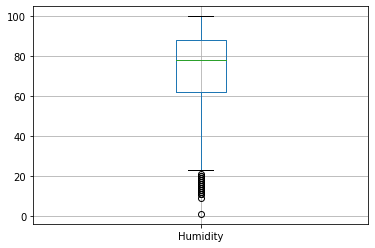

In [42]:
boxplot = city_weather_limited.boxplot(column=['Humidity'])

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression